# Demonstration (Library Usage)

> **Tip:** For deeper understanding and greater control, consult the documentation for each class, method, and module. You can hover over component names to view inline documentation, or open the relevant source code for detailed insights and customization options. This approach is highly recommended for effective development and troubleshooting.

 ## 1. Dataset preparation

Netweaver provides convenient functions to download the Fashion MNIST dataset and extract it, making it easy to get started with building neural networks.

In [1]:
from netweaver import download_fashion_mnist_dataset, load_dataset

### 1.1 Download
`download_fashion_mnist_dataset`: This function creates a 'datasets' directory in the specified path if it doesn't exist. It then checks for a 'fashion_mnist_images' folder within the datasets directory. If the folder is not present, it downloads the Fashion MNIST dataset and extracts it.

In [2]:
download_fashion_mnist_dataset(path_project_root="/home/USER_NETWEAVER/project_netweaver/")

Fashion_mnish_dataset is already available in /home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images


### 1.2 Loads to memory
 `load_dataset`: This function loads the dataset from the specified directory, which must contain
    'train' and 'test' subdirectories. Each sample or instances should be placed in a folder named after its label indices (zero-based indexing)
    The function reads all images and their associated labels from these subdirectories, prints Summarization and returns them as numpy arrays.

In [3]:
path_dataset = "/home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images"
instances_train, gtruth_train, instances_test, gtruth_test = load_dataset(path_dataset)

Property                 | instances_train  gtruth_train     instances_test   gtruth_test      
-----------------------------------------------------------------------------------------------
instances count          | 60000            60000            10000            10000            
shape of the set         | (60000, 28, 28)  (60000,)         (10000, 28, 28)  (10000,)         
shape of an instance     | (28, 28)         (1,)             (28, 28)         (1,)             
Data type of unit        | float32          uint8            float32          uint8            
Total memory (gb)        | 0.17524          0.00006          0.02921          0.00001          


### 1.3 Data Verification and Label Mapping
Before starting the training process, it is important to verify that the data has been loaded correctly. Additionally, creating a mapping from label indices to their corresponding class names will help interpret the model's predictions more easily during evaluation and visualization.

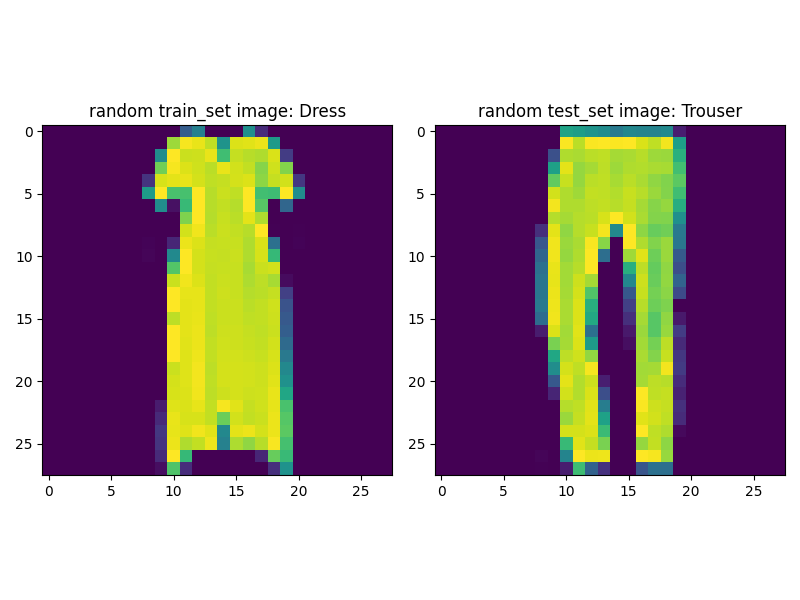

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.29411766 0.43529412 0.         0.         0.         0.49803922 0.12156863 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.85490197 0.9882353  0.96862745 0.90588236 0.5137255  0.9490196  0.95686275 0.972549   0.54509807 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.49019608 1.         0.92156863 0.9254902  0.96862745 0.69411767 0.9137255  0.89411765 0.88235295 0.94509804 0.1764706  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [4]:
from random import randint

import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(linewidth=500)

# label indices to class names mapping
labels_fashion_mnist = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

random_train_index = randint(0, 60000 - 1)
random_test_index = randint(0, 10000 - 1)


fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(instances_train[random_train_index])
axes[0].set_title(f"random train_set image: {labels_fashion_mnist[gtruth_train[random_train_index]]}")
axes[1].imshow(instances_test[random_test_index])
axes[1].set_title(f"random test_set image: {labels_fashion_mnist[gtruth_test[random_test_index]]}")
plt.tight_layout()
plt.show()
print(instances_train[random_train_index])

## 2. Dataset Pre-processing
Data pre-processing is essential before training a model because it ensures the input data is clean, consistent, and in a suitable format for learning. Proper pre-processing, such as scaling, flattening, and shuffling, helps improve model performance, accelerates convergence, and reduces the risk of bias or overfitting by ensuring the model generalizes well to new, unseen data.

### 2.1 Scaling
- Two scaling functions are provided for preprocessing image data:

1. **`scale_neg_pos_one`**:  
    This function transforms the input array so that its values are scaled to the range **[-1, +1]** (inclusive). It does this by centering the data around zero and normalizing based on the maximum possible value. This scaling is useful for neural networks that benefit from inputs distributed around zero, which can help with convergence during training.

2. **`scale_zero_one`**:  
    This function rescales the input array to the range **[0, 1]** (inclusive) by dividing each element by the maximum value. This is a common normalization technique for image data, especially when using activation functions that expect non-negative inputs.

Both functions require the maximum value present in the data (typically 255 for 8-bit grayscale images) to perform the scaling.


In [5]:
def scale_neg_pos_one(arr, maxvalue):
    max_half = maxvalue / 2
    return (arr - max_half) / max_half


def scale_zero_one(arr, maxvalue):
    return arr / maxvalue

Any preprocessing rules should be derived without knowledge of testing data, but then applied to the testing data

In [6]:
max_value = instances_train.max()
instances_train = scale_neg_pos_one(instances_train, max_value)
instances_test = scale_neg_pos_one(instances_test, max_value)

### 2.2 Flattening
Flattening transforms each 2D image (28x28 pixels) into a 1D vector (length 784) so that it can be used as input for dense (fully connected) neural network layers. Dense layers expect input data in a flat, vectorized format rather than a matrix. By flattening, we ensure that each pixel's value becomes a separate feature, allowing the neural network to process the image data correctly and learn patterns across all pixels. This step is essential for compatibility between image data and standard feedforward neural network architectures.

In [7]:
instances_train = instances_train.reshape(instances_train.shape[0], -1)
instances_test = instances_test.reshape(instances_test.shape[0], -1)

print(instances_train.shape)
print(instances_test.shape)

(60000, 784)
(10000, 784)


### 2.3 Shuffling
Shuffling the training dataset before training is crucial to ensure that each mini-batch contains a diverse mix of examples from all classes. This prevents the model from learning patterns based on the original order of the data, which might be sorted or grouped by class. Without shuffling, the model could become biased toward over-represented categories or fail to generalize well to new data. By randomizing the order of the training instances, we promote better learning, reduce the risk of overfitting to specific patterns, and help the model achieve higher accuracy and robustness.

In [8]:
keys = np.array(range(instances_train.shape[0]))
rng = np.random.default_rng()
rng.shuffle(keys)

In [9]:
instances_train = instances_train[keys]
gtruth_train = gtruth_train[keys]

## 3. Training

### 3.1 Importing Essential Classes for Model Building

- For this classification task, we will use a combination of layers and utilities: Dense layers for fully connected neural network structure, ReLU activation functions for non-linearity, and a Softmax activation at the output layer for multi-class probability distribution. The model will be trained using Categorical Crossentropy loss and optimized with the Adam optimizer.

- To import only the components you need, use:  
    `from netweaver import Model, LayerDense, ActivationReLU, ActivationSoftmax, LossCategoricalCrossentropy, OptimizerAdam, AccuracyCategorical`
- To import all available layers, losses, and optimizers, use:  
    `from netweaver import *`
    - The available components in Netweaver include:
        1. `Model` Class

        2. Layer Classes:  
            2.1. `LayerDense`  
            2.2. `LayerDropout`

        3. Activation Classes:  
            3.1. `ActivationReLU`  
            3.2. `ActivationSoftmax`  
            3.3. `ActivationSigmoid`  
            3.4. `ActivationLinear`  

        4. Loss Classes:  
            4.1. `LossCategoricalCrossentropy`  
            4.2. `LossBinaryCrossentropy`  
            4.3. `LossMeanSquaredError`  
            4.4. `LossMeanAbsoluteError`  

        5. Optimizer Classes:  
            5.1. `OptimizerSGD`  
            5.2. `OptimizerAdagrad`  
            5.3. `OptimizerRMSprop`  
            5.4. `OptimizerAdam`  

        6. Accuracy Classes:  
            6.1. `AccuracyCategorical`  
            6.2. `AccuracyRegression`  

        7. Other Functions  
            7.1. `load_dataset`  
            7.2. `download_fashion_mnist_dataset` 

> **Note:** In Netweaver, activation functions are treated as layers, which may differ from other popular libraries.

In [10]:
from netweaver import (
    AccuracyCategorical,
    ActivationReLU,
    ActivationSoftmax,
    LayerDense,
    LayerDropout,
    LossCategoricalCrossentropy,
    Model,
    OptimizerAdam,
)

### 3.2 Defining the Model Object

Creating a `Model` object is the foundational step in building and managing your neural network workflow. The `Model` class in Netweaver offers a comprehensive interface for constructing, training, evaluating, and persisting deep learning models. Its key methods include:

1. **`add(layer)`**: Sequentially add layers (e.g., Dense, Activation) to define the architecture.

2. **`finalize()`**: Chain and prepare all added layers for training and inference.
3. **`set(loss, optimizer, accuracy)`**: Specify the loss function, optimizer, and accuracy metric for training.
4. **`summary()`**: Display a detailed summary of the model’s architecture, including layers and parameter counts.
5. **`train(instances_train, gtruth_train, ...)`**: Start the training process with the provided data and configuration.
6. **`predict(instances_prediction)`**: Generate predictions for new, unseen data.
7. **`save_parameters(path)`**: Save only the model’s trainable parameters (weights and biases) to a file.
8. **`load_parameters(path)`**: Load previously saved parameters into the model.
9. **`save_model(path)`**: Serialize and save the entire model (architecture, parameters, and configuration) to a file.
10. **`load_model(path)`**: *(Static method)* Restore a complete model from a saved file, ready for inference or further training.

These methods provide a flexible and modular approach to model development, making it easy to experiment, iterate, and deploy neural networks efficiently.


In [11]:
model = Model()

### 3.3 Add layers
- The **input size** of the first dense layer (784) must exactly match the **number of features** in each flattened image (28 × 28 pixels).
- The **number of neurons** in the final dense layer should equal the **number of target classes** in the dataset, which is 10 for Fashion MNIST.

In [12]:
model.add(LayerDense(n_inputs=784, n_neurons=128))
model.add(ActivationReLU())
model.add(LayerDropout(rate=0.4))

model.add(LayerDense(n_inputs=128, n_neurons=64))
model.add(ActivationReLU())
model.add(LayerDropout(rate=0.3))

model.add(LayerDense(n_inputs=64, n_neurons=32))
model.add(ActivationReLU())
model.add(LayerDropout(rate=0.2))

model.add(LayerDense(n_inputs=32, n_neurons=16))
model.add(ActivationReLU())
model.add(LayerDropout(rate=0.1))

model.add(LayerDense(n_inputs=16, n_neurons=10))
model.add(ActivationSoftmax())

### 3.4 Set Loss, Optimzer and Accuracy
Provide the `loss`, `optimizer`, and appropriate `accuracy` objects as keyword arguments to the `model.set()` method to fully configure the model for training.

In [13]:
model.set(loss=LossCategoricalCrossentropy(), optimizer=OptimizerAdam(decay=0.001), accuracy=AccuracyCategorical())

### 3.5 Finalize the model
Finalize the model by chaining all layers, then display a summary of the architecture and parameter counts.

In [15]:
model.finalize()




# Layer_Dense(): n_inputs: 784| n_neurons: 128| L1_w: 0.0| L1_b: 0.0| L2_w: 0.0| L2_b:0.0
------------------------------------------------------------------------------------------------------------------------
# Activation_ReLu()
------------------------------------------------------------------------------------------------------------------------
# Layer_Dropout(): dropout rate: 0.400
------------------------------------------------------------------------------------------------------------------------
# Layer_Dense(): n_inputs: 128| n_neurons: 64| L1_w: 0.0| L1_b: 0.0| L2_w: 0.0| L2_b:0.0
------------------------------------------------------------------------------------------------------------------------
# Activation_ReLu()
------------------------------------------------------------------------------------------------------------------------
# Layer_Dropout(): dropout rate: 0.300
-----------------------------------------------------------------------------------------------

### 3.6 Model Training


- To initiate the training process, call the `train` method on your `Model` instance, providing the training data (`instances_train`), ground truth labels (`gtruth_train`), the number of epochs, and the batch size. You can also include validation data (`validation_data`) to monitor the model's performance on unseen data during training.

- The `path_log` parameter is crucial for specifying the directory where training logs and model files will be saved. If the specified directory (e.g., `/logs`) does not exist, it will be created automatically. The generated log and model files are automatically suffixed with a timestamp indicating when the training started, following the format: `{now:%Y%m%d-%H%M%S}`. This ensures that each training run has its own unique set of logs and model files, making it easier to track and compare different training sessions.

#### Visualizing Training Progress

- To monitor training metrics such as loss and accuracy over epochs and batches, open a separate notebook and use the `PlotTraining` class.

- Copy the log file paths (for epochs, batches, and validation) from the training output and pass them as parameters to `PlotTraining`.
- For detailed instructions and examples, refer to the [`demo_metricmonitor.ipynb`](demo_metricmonitor.ipynb) file.

In [16]:
model.train(instances_train=instances_train, gtruth_train=gtruth_train, epochs=40, batch_size=128, validation_data=(instances_test, gtruth_test))

Model Architecture file: /home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/model-architecture-20250523-132244.txt
Epoch Log: /home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/Log-epoch-20250523-132244.csv
Batch Log: /home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/Log-batch-20250523-132244.csv
Validation Log: /home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/Log-validation-20250523-132244.csv


Training       :   0%|          | 0/40 [00:00<?, ?epoch/s]

Epoch 1       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 2       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 3       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 4       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 5       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 6       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 7       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 8       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 9       :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 10      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 11      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 12      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 13      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 14      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 15      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 16      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 17      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 18      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 19      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 20      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 21      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 22      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 23      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 24      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 25      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 26      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 27      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 28      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 29      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 30      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 31      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 32      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 33      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 34      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 35      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 36      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 37      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 38      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 39      :   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 40      :   0%|          | 0/469 [00:00<?, ?batch/s]

### 3.7 Save the model
After training is complete, save the entire model—including its architecture, parameters, and configuration—to a file. This allows you to  easily reload the model later for future predictions or further training, ensuring reproducibility and efficient workflow management.

In [17]:
model.save_model()

model saved successfully
model file: /home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/model-20250523-132244.model


## 4. Load the Model

### 4.1 To utilize a previously trained model
 load it from the saved file using the `load_model` static method of the `Model` class.


In [19]:
path_modelfile = (  # repalce with your model path
    "/home/USER_NETWEAVER/project_netweaver/notebooks/demonstration/logs/model_training/model-20250523-132244/model-20250523-132244.model"
)
model_loaded: Model = Model.load_model(path=path_modelfile)

 - Before proceeding with prediction, it's crucial to apply the same preprocessing steps to the test set as were used during training. This ensures consistency and accurate evaluation. 

 
 - Specifically, ensure the test set is shuffled to provide a representative sample for prediction.


In [20]:
keys = np.array(range(instances_test.shape[0]))
rng = np.random.default_rng()
rng.shuffle(keys)

instances_test = instances_test[keys]
gtruth_test = gtruth_test[keys]

In [21]:
instances_predict = instances_test[:20]
gruth_predict = gtruth_test[:20]

### 4.2 Making Predictions

To generate predictions using the loaded model:

1.  Pass the set of instances you wish to predict on to the `predict` method. This will output a list of confidence scores for each instance across all classes.  

2.  To obtain the final prediction from these confidence scores, use the `predictions` method of the `output_layer_activation` object, which is an attribute of the model instance. The `output_layer_activation` object contains a prediction method that corresponds to the activation function used in the output layer of the model, ensuring accurate conversion of confidence scores to class predictions.

In [22]:
confidences = model_loaded.predict(instances_prediction=instances_predict)
predictions = model_loaded.output_layer_activation.predictions(confidences)

In [23]:
print(confidences)
print(predictions)

[[1.50414615e-028 6.23591818e-156 4.18032083e-039 1.57855360e-041 1.16874511e-028 9.99991945e-001 6.47508848e-036 5.65869586e-006 2.39642054e-006 6.07084853e-016]
 [4.00087855e-003 1.09213088e-002 5.73837456e-012 9.84987178e-001 1.19899616e-008 1.96805809e-021 3.37559649e-005 5.80003404e-062 5.68670575e-005 1.31569482e-115]
 [6.28905698e-001 6.13789409e-008 1.14910710e-004 3.49704148e-002 1.89971449e-003 3.49682060e-017 3.34039270e-001 1.11458180e-039 6.99305965e-005 2.60622894e-068]
 [5.07894934e-003 9.61129613e-003 1.55316673e-011 9.85176767e-001 2.44937082e-008 9.19447788e-021 5.29451335e-005 6.24099144e-060 8.00175754e-005 9.76262802e-112]
 [4.08660876e-054 2.29354626e-288 1.67369318e-070 4.14641623e-081 8.46684941e-054 1.97478229e-003 2.06861981e-066 9.97812759e-001 3.61883406e-014 2.12458613e-004]
 [2.80986335e-005 2.44545419e-080 2.46277361e-001 3.14801812e-022 6.98662048e-001 3.06614218e-013 5.50226491e-002 5.81882258e-018 9.84283160e-006 1.37852048e-022]
 [9.67094627e-001 3.36

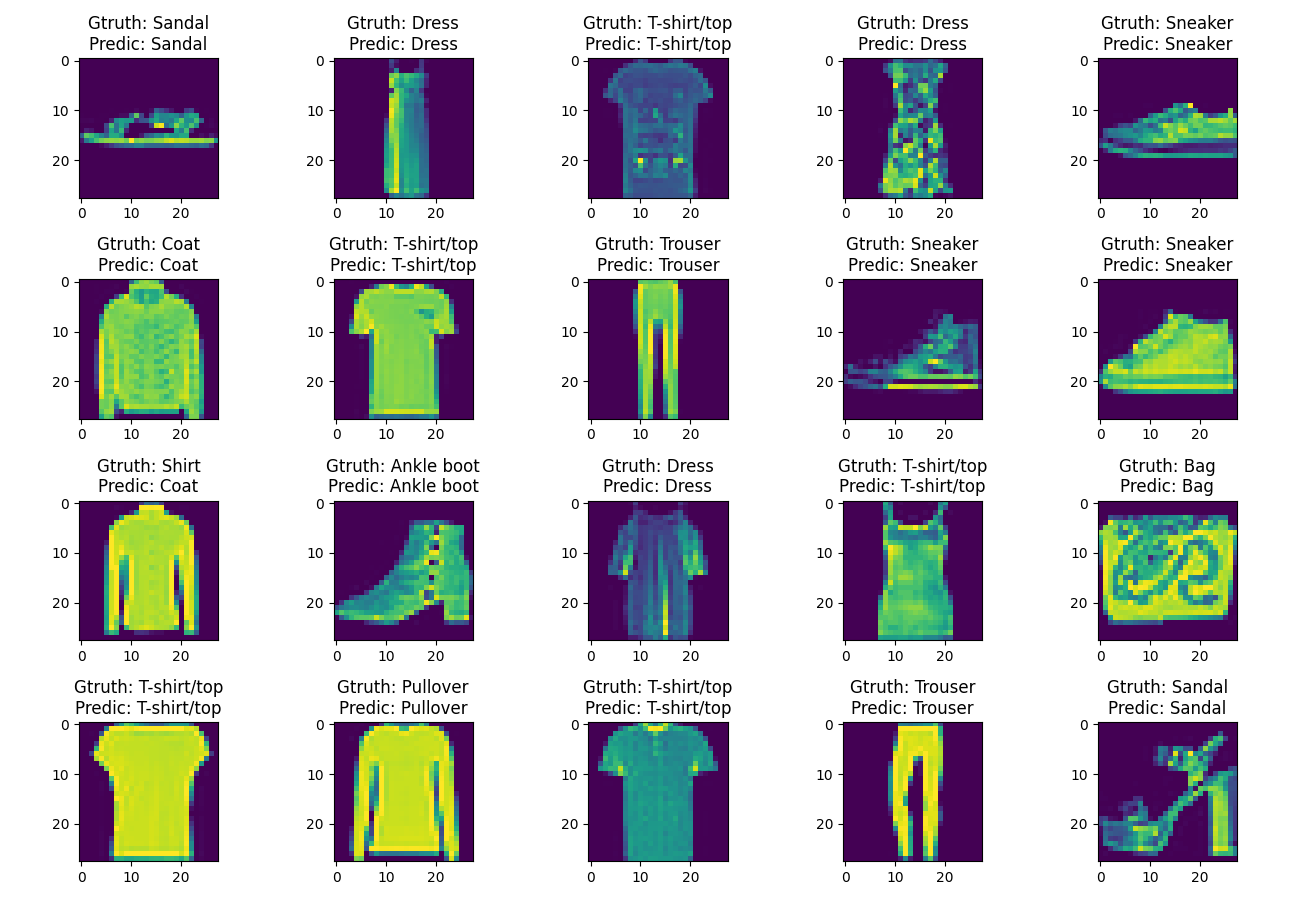

In [27]:
import itertools

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(13, 9))

for index, (row, col) in enumerate(itertools.product(range(4), range(5))):
    axes[row][col].imshow(instances_predict[index].reshape(28, 28))
    axes[row][col].set_title(f"Gtruth: {labels_fashion_mnist[gruth_predict[index]]}\nPredic: {labels_fashion_mnist[predictions[index]]}")

plt.tight_layout()
plt.show()